In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Creating a mock dataset for Monkeypox outbreak
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=200)
data = {
    'Date': np.random.choice(dates, 1000),
    'Country': np.random.choice(['USA', 'Brazil', 'Zimbabwe', 'UK', 'Spain', 'India'], 1000),
    'Age_Group': np.random.choice(['0-14', '15-24', '25-34', '35-44', '45-54', '55+'], 1000),
    'Gender': np.random.choice(['Male', 'Female'], 1000),
    'Cases': np.random.poisson(lam=3, size=1000),
    'Deaths': np.random.poisson(lam=0.5, size=1000),
    'Recovered': np.random.poisson(lam=2, size=1000)
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()

,Date,Country,Age_Group,Gender,Cases,Deaths,Recovered
0,2023-04-13,USA,15-24,Female,4,2,0
1,2023-06-29,UK,55+,Male,2,0,2
2,2023-04-03,Zimbabwe,15-24,Female,2,0,2
3,2023-01-15,Brazil,25-34,Male,3,0,2
4,2023-04-17,USA,0-14,Male,4,0,2


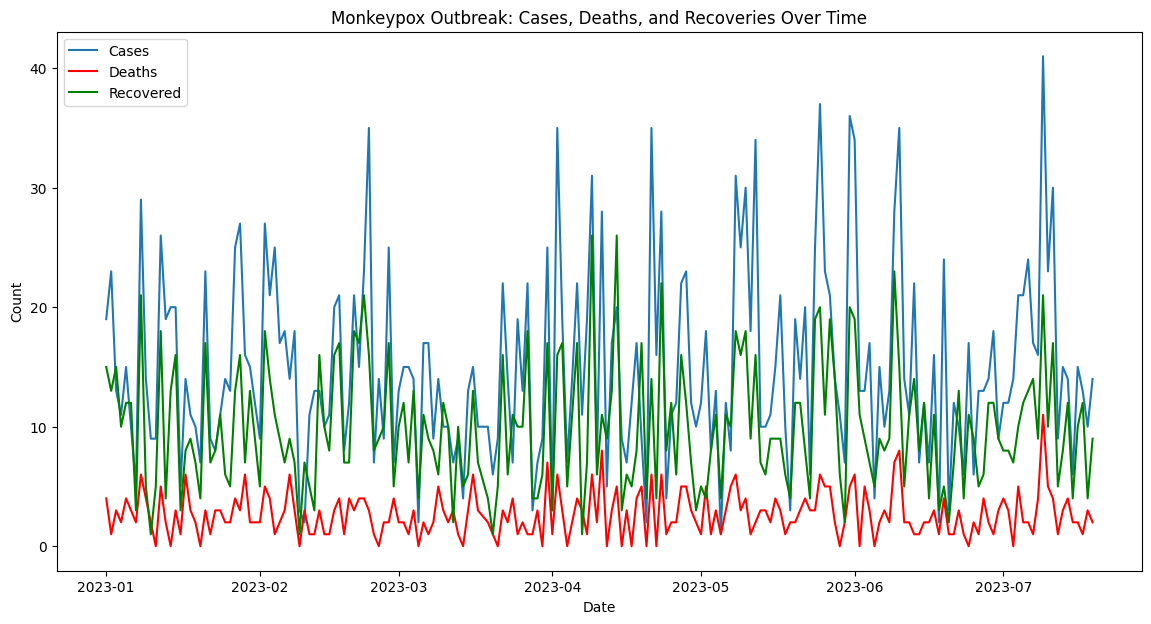

In [3]:
#Time series plot to try and Understand the spread of Monkeypox 
#over time is crucial for assessing the outbreak's progression. 
# Aggregate cases by date
time_data = df.groupby('Date').agg({'Cases': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

# Plotting the time series data
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Cases', data=time_data, label='Cases')
sns.lineplot(x='Date', y='Deaths', data=time_data, label='Deaths', color='red')
sns.lineplot(x='Date', y='Recovered', data=time_data, label='Recovered', color='green')
plt.title('Monkeypox Outbreak: Cases, Deaths, and Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

This time series plot shows the trend of Monkeypox cases, deaths, and recoveries over time. 
It can reveal patterns such as peaks, declines, or the impact of public health interventions.

C:\Users\avais\AppData\Local\Temp\ipykernel_20020\1065321001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cases', y='Country', data=country_data, palette='coolwarm')


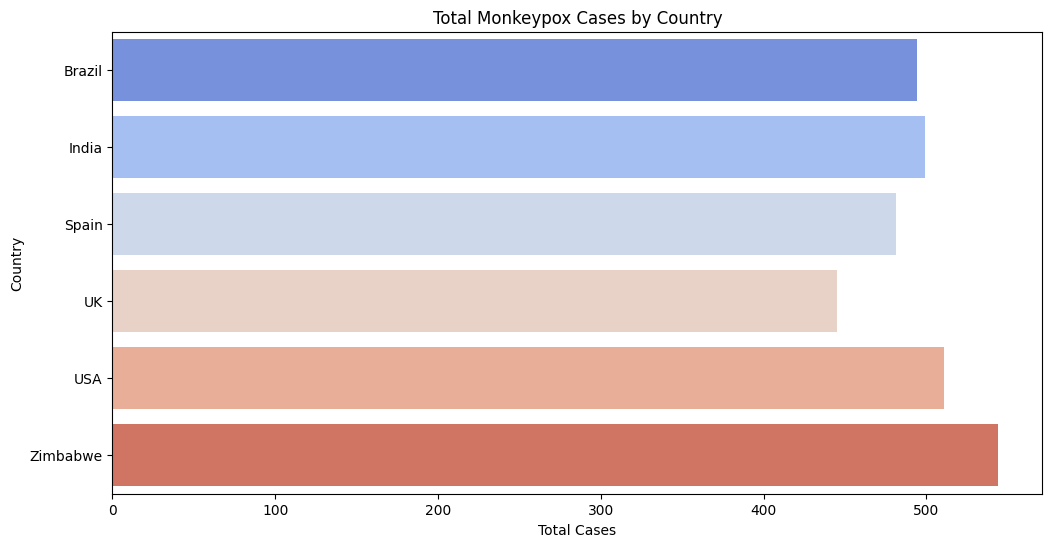

In [4]:
#Bar chart to depict geographic distribution to reveal how the outbreak spread across different countries or regions.
# Aggregate cases by country
country_data = df.groupby('Country').agg({'Cases': 'sum', 'Deaths': 'sum'}).reset_index()

# Plotting a bar chart for cases by country
plt.figure(figsize=(12, 6))
sns.barplot(x='Cases', y='Country', data=country_data, palette='coolwarm')
plt.title('Total Monkeypox Cases by Country')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

This bar chart highlights which countries have been most affected by the Monkeypox outbreak, helping to identify geographic 
hotspots.

C:\Users\avais\AppData\Local\Temp\ipykernel_20020\59042781.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df, palette='viridis', order=['0-14', '15-24', '25-34', '35-44', '45-54', '55+'])


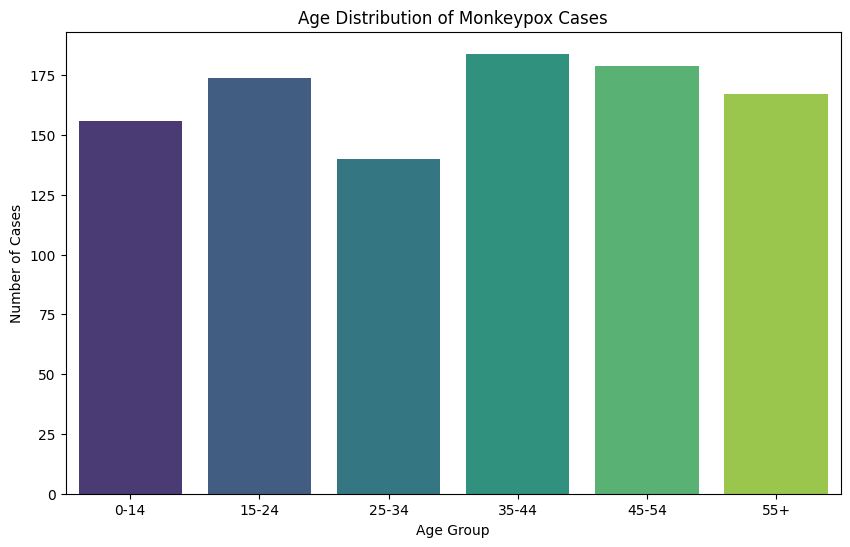

C:\Users\avais\AppData\Local\Temp\ipykernel_20020\59042781.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


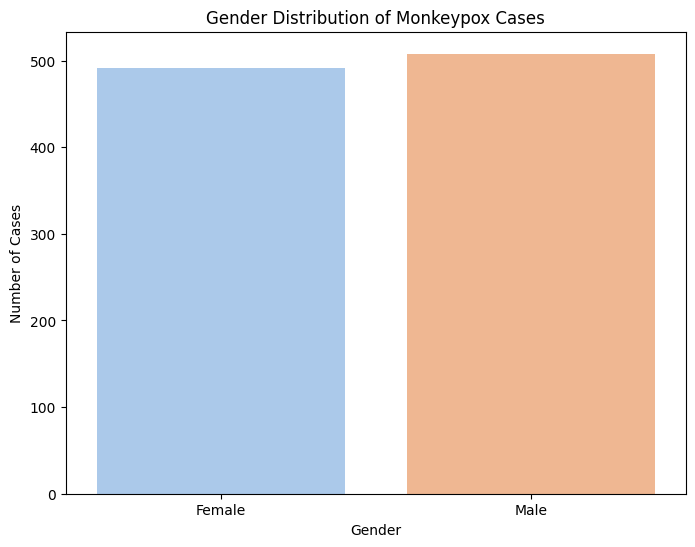

In [5]:
#Understanding the demographic distribution of cases can help target interventions effectively.
# Plotting the age distribution of cases
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=df, palette='viridis', order=['0-14', '15-24', '25-34', '35-44', '45-54', '55+'])
plt.title('Age Distribution of Monkeypox Cases')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.show()

# Plotting the gender distribution of cases
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution of Monkeypox Cases')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.show()

The age distribution plot shows which age groups are most affected by the outbreak, while the gender distribution plot provides
insight into any gender disparities in infection rates.

In [6]:
#Interactive Visualization - Cases Over Time by Country to explore how the number of cases changed over time 
#in different countries.
# Aggregating data by date and country
time_country_data = df.groupby(['Date', 'Country']).agg({'Cases': 'sum'}).reset_index()

# Creating an interactive line plot using Plotly
fig = px.line(time_country_data, x='Date', y='Cases', color='Country', 
              title='Monkeypox Cases Over Time by Country')
fig.update_layout(xaxis_title='Date', yaxis_title='Number of Cases')
fig.show()

This interactive plot allows you to explore how the outbreak evolved over time in different countries, making it easier to 
identify when and where the spread accelerated.

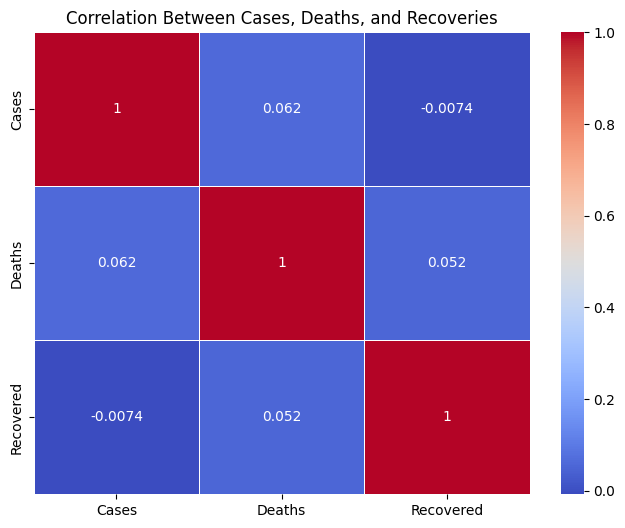

In [7]:
#Heatmap - Correlation Between Variables such as cases, deaths, and recoveries.
# Correlation matrix
corr_matrix = df[['Cases', 'Deaths', 'Recovered']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Cases, Deaths, and Recoveries')
plt.show()

The heatmap reveals the relationships between cases, deaths, and recoveries. A high correlation between cases and deaths 
could indicate a severe outbreak, while a high correlation between cases and recoveries might suggest effective treatment 
or intervention.

This notebook showcases how to use data storytelling to understand and communicate key aspects of the Monkeypox outbreak. 
By visualizing the spread over time, geographic distribution, demographic impact, and correlations between variables, 
we can gain valuable insights that can inform public health strategies and responses.
These visualizations are not only informative but also help make complex data accessible and understandable, 
making them powerful tools for decision-makers, healthcare professionals, and the general public.
